In [61]:
from bauer.models import ExpectedUtilityRiskModel, ExpectedUtilityRiskRegressionModel, RiskModel

In [62]:
from risk_experiment.utils.data import get_all_behavior

In [63]:
df = get_all_behavior(sessions='3t2', bids_folder='/data/ds-risk')

100%|██████████| 30/30 [00:01<00:00, 17.61it/s]


In [64]:
df['choice'] = df['choice'] == 2

In [65]:
model = ExpectedUtilityRiskModel(d, save_trialwise_eu=True, probability_distortion=True)
model.build_estimation_model()
idata = model.sample(target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_mu_untransformed, alpha_sd, alpha_offset, sigma_mu_untransformed, sigma_sd, sigma_offset, phi_mu_untransformed, phi_sd, phi_offset]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [6]:
model = ExpectedUtilityRiskModel(d, store_eu=True)
model.build_estimation_model()

In [7]:
idata = model.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_mu_untransformed, alpha_sd, alpha_offset, sigma_mu_untransformed, sigma_sd, sigma_offset]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 80 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


In [20]:
ppc = model.ppc(d, idata, var_names='p')
ppc.loc[ppc.index.get_level_values('risky_first')] = 1 - ppc.loc[ppc.index.get_level_values('risky_first')]

In [21]:
from bauer.utils.plotting import plot_ppc
from risk_experiment.cogmodels.utils import plot_ppc, cluster_offers

In [22]:
# if not (d.groupby(['subject', 'log(risky/safe)']).size().groupby('subject').size() < 7).all():
#     d['log(risky/safe)'] = d.groupby(['subject'],
#                                     group_keys=False).apply(cluster_offers)

In [56]:
plot_ppc(d, ppc, var_name='bernoulli', level='group', plot_type=3)

NameError: name 'plot_ppc' is not defined

In [23]:
plot_ppc?

Signature:
plot_ppc(
    df,
    ppc,
    plot_type=1,
    var_name='ll_bernoulli',
    level='subject',
    col_wrap=5,
    legend=True,
)
Docstring: <no docstring>
File:      ~/git/risk_experiment/risk_experiment/cogmodels/utils.py
Type:      function

In [9]:
with model.estimation_model:
    model_inputs = model.get_model_inputs()

In [18]:
from bauer.utils import cumulative_normal

In [26]:
eu1 = model_inputs['p1'] * model_inputs['n1']
eu2 = model_inputs['p2'] * model_inputs['n2']


p = cumulative_normal(eu2 - eu1, 0.0, 100)

In [25]:
def prob_distortion(p, phi):
    return (p**phi) / ((p**phi + (1-p)**phi)**(1/phi))

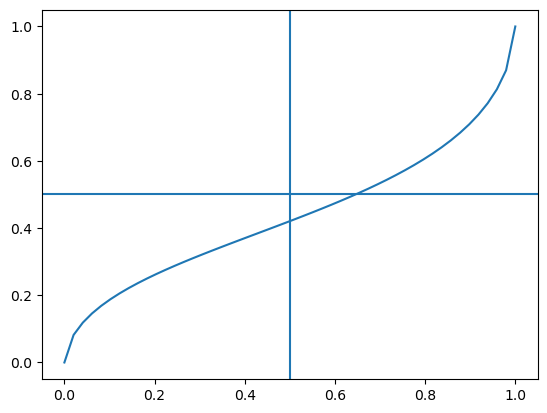

In [33]:
import numpy as np
import matplotlib.pyplot as plt
p = np.linspace(0,1)

plt.plot(p, prob_distortion(p, .61))
plt.axhline(0.5)
plt.axvline(0.5)

In [ ]:
p.eval()

array([0.50897544, 0.5125646 , 0.4986037 , 0.47667518, 0.50039894,
       0.51635205, 0.54141533, 0.49940159, 0.51136832, 0.49581118,
       0.50817774, 0.52511675, 0.48364795, 0.45858467, 0.51655135,
       0.49082514, 0.50119683, 0.51774707, 0.48803353, 0.51774707,
       0.50059841, 0.49980053, 0.49621011, 0.49102456, 0.49760636,
       0.50538556, 0.50378989, 0.50738001, 0.48763477, 0.4980053 ,
       0.52073565, 0.48344865, 0.4980053 , 0.4986037 , 0.52929588,
       0.50817774, 0.49321831, 0.49401609, 0.47926435, 0.50239364,
       0.49980053, 0.48384725, 0.48863168, 0.49182226, 0.50618336,
       0.49461444, 0.5019947 , 0.49621011, 0.54795646, 0.46692577,
       0.48763477, 0.53585639, 0.50897544, 0.50917486, 0.48225293,
       0.49581118, 0.51037133, 0.5227274 , 0.51575412, 0.50897544,
       0.49102456, 0.49760636, 0.49321831, 0.47488325, 0.51057073,
       0.50239364, 0.48364795, 0.4874354 , 0.50777888, 0.48922987,
       0.47926435, 0.50059841, 0.50718057, 0.52332482, 0.48962

In [29]:
model.estimation_model['choice'].eval()

array([ 2.,  2.,  2.,  1.,  2.,  2.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,
        1.,  2.,  2.,  2.,  2.,  1.,  2.,  1.,  2.,  2.,  1.,  1.,  1.,
        2.,  2.,  2.,  1.,  1.,  2.,  1.,  2.,  2.,  2.,  1.,  2.,  2.,
        2.,  1.,  1.,  2.,  1.,  2.,  1.,  2.,  1.,  2.,  2.,  1.,  2.,
        2.,  2.,  1.,  2.,  2.,  1.,  2.,  2.,  1.,  2.,  1.,  2.,  2.,
        1.,  1.,  1.,  2.,  2.,  1.,  1.,  2.,  2.,  2.,  2.,  1.,  2.,
        2.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  1.,  2.,  1.,  1.,  2.,  2.,  1.,  2.,  2.,  1.,  2.,  2.,
        1.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  1.,  2.,  2.,  1.,
        1.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  1.,  1.,  1.,
        2.,  2.,  2.,  1.,  2.,  1.,  2.,  1.,  2.,  1.,  2.,  1.,  2.,
        1.,  1.,  2.,  2.,  1.,  2.,  2.,  1.,  2.,  1.,  2.,  1.,  2.,
        1.,  1.,  2.,  1.,  2.,  2.,  2.,  1.,  2.,  1.,  2.,  2.,  1.,
        2.,  2.,  2.,  1.,  2.,  2.,  2.,  1.,  2.,  1.,  1.,  1